## Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30) from the population, then the distribution of the sample means will be approximately normally distributed

In [20]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
roll  = stats.randint(1, 7)

Text(0.5, 1.0, 'Uniform Population distribution')

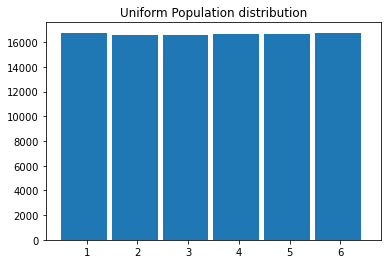

In [91]:
plt.hist(roll.rvs(100000), bins= [1,2,3,4,5,6,7], align = 'left', width = 0.9)
plt.title('Uniform Population distribution')

In [95]:
roll.rvs(100000).mean()

3.49319

### Distribution of sample means 
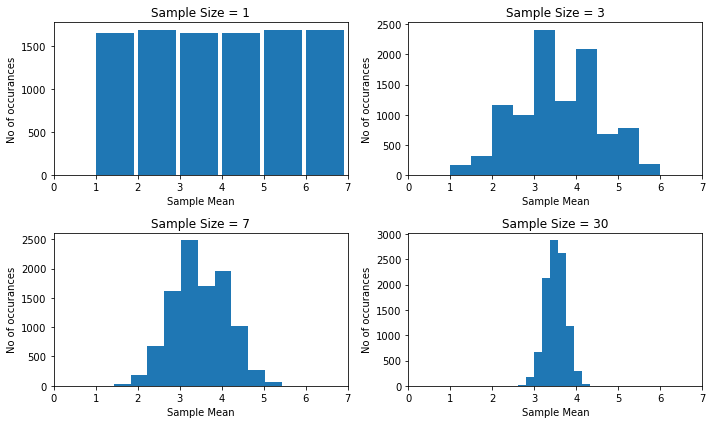

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

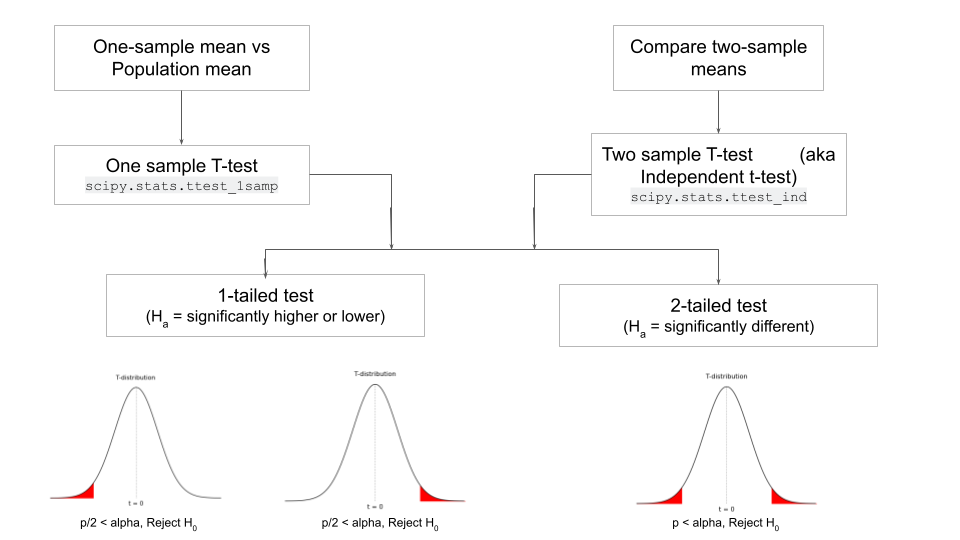

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Example 1

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [23]:
# read the csv file 
df = pd.read_csv("Cust_Churn_Telco.csv")  

In [24]:
# look at the head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**A. Plot Distribution**

<AxesSubplot:>

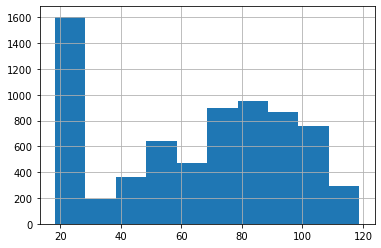

In [25]:
# plot distribution of monthly charges

df.MonthlyCharges.hist()


<AxesSubplot:>

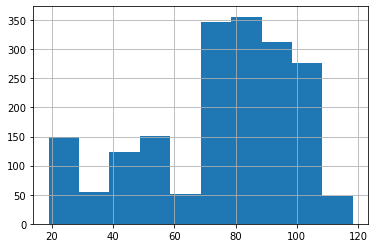

In [27]:
# plot distribution of montly charges for customer who churn

churn_sample = df[df.Churn== 'Yes'].MonthlyCharges
churn_sample.hist()

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

**C. Set Alpha**

In [28]:
# we decide on 95% cofidence level (alpha = 0.05)

alpha = 0.05

**D. Verify Assumptions**

In [29]:
# How big is sample size for churned customers?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [31]:
# calculate t and p statistic
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges
overall_mean = df.MonthlyCharges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(16.965403080505645, 1.8703196496920532e-60, 0.05)

**F. Decide**

Is 1/2 * p < alpha AND t > 0? 

Is $t > 0$ and $p/2 < \alpha$

In [32]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [33]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p , alpha

(16.965403080505645, 3.7406392993841064e-60, 0.05)

**F. Is p-value less than alpha?**

In [34]:
if p <  alpha:
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

We reject the null hypothesis


## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not)


5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`

6. Decide. 

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 2-sample (comparing 2 groups) t-test.  

<AxesSubplot:>

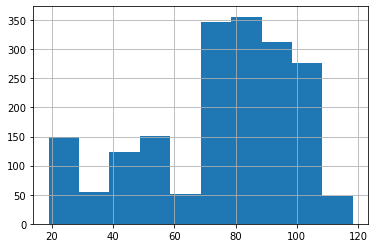

In [35]:
# histogram of churned customers
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges

churn_sample.hist()

<AxesSubplot:>

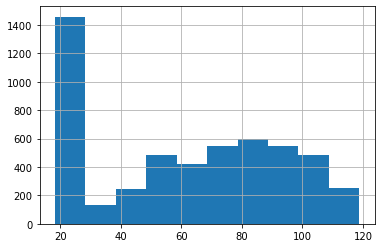

In [36]:
# histogram of non-churned customers

no_churn_sample = df[df.Churn == 'No'].MonthlyCharges

no_churn_sample.hist()

**Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of customers who haven't churned  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned  

**Set Alpha**

In [37]:
alpha = .05

**Verify Assumptions**

1. Independent Samples. YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [38]:
churn_sample.var(), no_churn_sample.var()

(608.4141833954304, 966.7527670734287)

If no, we will set the argument of equal_var to False. 

**Compute Test Statistic**

In [42]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p/2, alpha

(18.407526676414673, 4.2962246657737696e-73, 0.05)

**Decide**

In [43]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [44]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is not equal to that of those who don't churn. 

We can use 2 sample, 2-tailed t-test here

In [45]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p, alpha

(18.407526676414673, 8.592449331547539e-73, 0.05)

**Decide**

Is the p-value less than alpha?

In [46]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


## Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is less than that of those who don't churn. 

In [47]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p/2, alpha

(18.407526676414673, 4.2962246657737696e-73, 0.05)

**Decide**

is t < 0? AND is p/2 < alpha?


In [48]:
print("Is t < 0? ", t<0)

print("is p/2 < alpha? ", p/2<alpha)

Is t < 0?  False
is p/2 < alpha?  True


In [49]:
if (p/2 < alpha) & (t < 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Summary
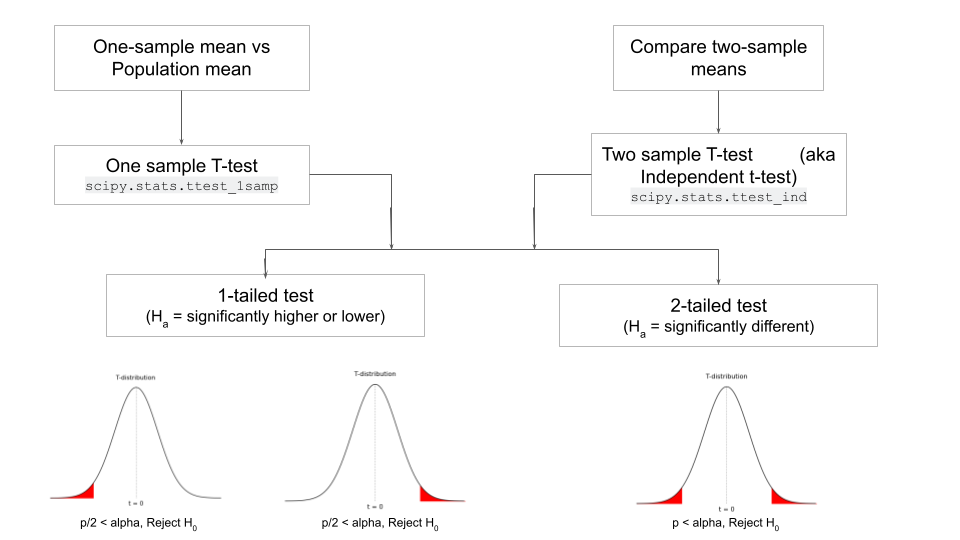

### MPG Example

In [50]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Drop nulls

In [53]:
# drop nulls
df = df.dropna()

#### Do the vehicle built in USA have higher HP than vehicle from Japan?

In [7]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower

**Plot Distribution**

<AxesSubplot:>

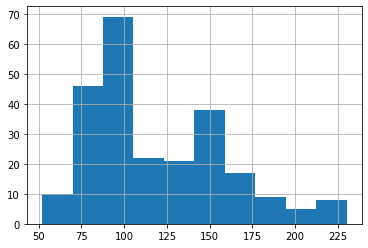

In [54]:
usa_hp.hist()

<AxesSubplot:>

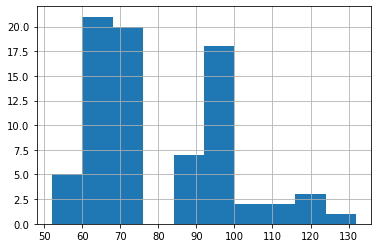

In [55]:
japan_hp.hist()

**Hypothesis**

$H_{0}$: hp is the same for usa and japan origin vehicles

$H_{a}$: hp is not the for usa and japan origin vehicles

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: No

In [57]:
usa_hp.count(), japan_hp.count()

(245, 79)

In [58]:
# do two sample have similar variances?

usa_hp.var(), japan_hp.var()

(1591.8336567413864, 317.5238558909445)

Looking at the variances, they are very different, so I will move forward with a 2-sample, independent t-test comparing usa made cars vs. japan made cars and set equal_var = False). 

In [59]:
# use Scipy's independent ttest to find t and p

t, p = stats.ttest_ind(usa_hp, japan_hp, equal_var= False)

t, p, alpha

(12.092022948407953, 1.5146320352820352e-27, 0.05)

**Decide**

is p-value less than alpha? 

In [60]:
p < alpha

True

Reject null hypothesis. The hp of usa cars vs. japan cars is significantly different. 

### Mini Exercise:

Are the USA origin vehicles heavier than vehicles with japan origin?

In [61]:
usa_weight = df[df.origin == 'usa'].weight
japan_weight = df[df.origin == 'japan'].weight

#### Decide?

One sample t-test or 2-sample t-test?  
One tailed or two tailed?

Two-Sample T-test, 1-tailed

#### Plot distributions

<AxesSubplot:>

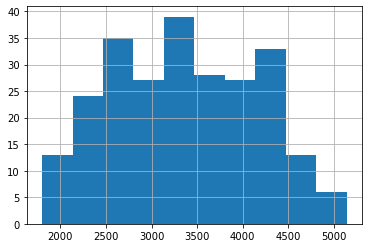

In [62]:
usa_weight.hist()

<AxesSubplot:>

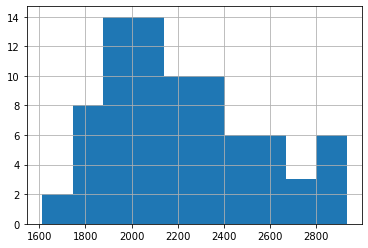

In [63]:
japan_weight.hist()

**Hypothesis**

$H_{0}$: average weight for usa origin vehicle == average weight for japan origin vehicle

$H_{a}$: average weight for usa origin vehicle > average weight for japan origin vehicle



**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: Yes!
- Independent: Yes! 
- Variance: 

In [65]:
usa_weight.var(), japan_weight.var()

(632576.3574774171, 102718.48588120737)

In [66]:
# use stats.ttest to calculate t and p
t, p = stats.ttest_ind(usa_weight, japan_weight, equal_var= False)

t, p/2, alpha

(18.477210677200812, 4.197101303537906e-52, 0.05)

#### Decide

In [67]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
